<h2 align='center'> Feature Selection- Dropping correlated features </h2>

### Correlated Features

#### What does correlated features mean?
- Two features are said to be **correlated** if they contain similar or related information.  
- Correlation measures how much the change in one feature is associated with the change in another.  
- Example:  
  - `Age` and `Birth_Year` are highly negatively correlated (knowing one gives you the other).  
  - `Height` and `Weight` might be moderately positively correlated (taller people tend to weigh more).  

---

#### Why are correlated features a problem?
- They carry **redundant information**.  
- Can cause **multicollinearity** in regression models (unstable coefficients).  
- May lead to **overfitting** (the model over-relies on redundant signals).  
- Adds **unnecessary complexity** (slower training, harder interpretation).  

---

#### Rule of Thumb
- If the **absolute correlation coefficient** between two features is **greater than 0.8 (or 0.85/0.9 depending on tolerance)** → they are considered **highly correlated**.  
- In that case, usually **drop one of them** (the one that’s less useful or harder to interpret).  


**In this step we will be removing the features which are highly correlated**

In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Loading the dataset
df = pd.read_csv('HousingData.csv',nrows=10000)

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [4]:
X = df.drop("MEDV",axis=1)   #Feature Matrix
y = df["MEDV"] 

In [5]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN


In [6]:
X.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.191178,0.401863,-0.054355,0.417130,-0.219150,0.354342,-0.374166,0.624765,0.580595,0.281110,-0.381411,0.444943
ZN,-0.191178,1.000000,-0.531871,-0.037229,-0.513704,0.320800,-0.563801,0.656739,-0.310919,-0.312371,-0.414046,0.171303,-0.414193
INDUS,0.401863,-0.531871,1.000000,0.059859,0.764866,-0.390234,0.638431,-0.711709,0.604533,0.731055,0.390954,-0.360532,0.590690
CHAS,-0.054355,-0.037229,0.059859,1.000000,0.075097,0.104885,0.078831,-0.093971,0.001468,-0.032304,-0.111304,0.051264,-0.047424
NOX,0.417130,-0.513704,0.764866,0.075097,1.000000,-0.302188,0.731548,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.582641
RM,-0.219150,0.320800,-0.390234,0.104885,-0.302188,1.000000,-0.247337,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.614339
AGE,0.354342,-0.563801,0.638431,0.078831,0.731548,-0.247337,1.000000,-0.744844,0.458349,0.509114,0.269226,-0.275303,0.602891
DIS,-0.374166,0.656739,-0.711709,-0.093971,-0.769230,0.205246,-0.744844,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.493328
RAD,0.624765,-0.310919,0.604533,0.001468,0.611441,-0.209847,0.458349,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.479541
TAX,0.580595,-0.312371,0.731055,-0.032304,0.668023,-0.292048,0.509114,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.536110


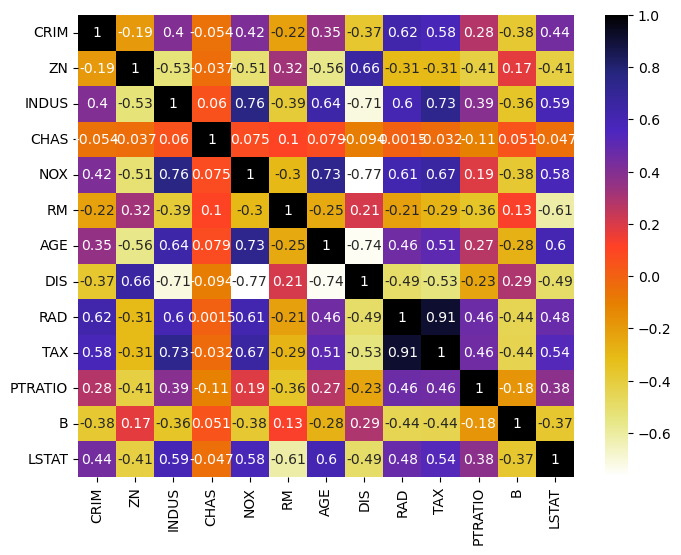

In [7]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(8,6))
cor = X.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [8]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [9]:
corr_features = correlation(X, 0.7)
len(set(corr_features))

4

In [10]:
corr_features

{'AGE', 'DIS', 'NOX', 'TAX'}

In [11]:
X.drop(corr_features,axis=1)

,CRIM,ZN,INDUS,CHAS,RM,RAD,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,6.575,1,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,6.421,2,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,7.185,2,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,6.998,3,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,7.147,3,18.7,396.90,NaN
...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,6.593,1,21.0,391.99,NaN
502,0.04527,0.0,11.93,0.0,6.120,1,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,6.976,1,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,6.794,1,21.0,393.45,6.48


#### Let try with Big Dataset

In [12]:
df=pd.read_csv('Santander.csv',nrows=10000)
X=df.drop(labels=['TARGET'], axis=1)
y=df['TARGET']

<Axes: >

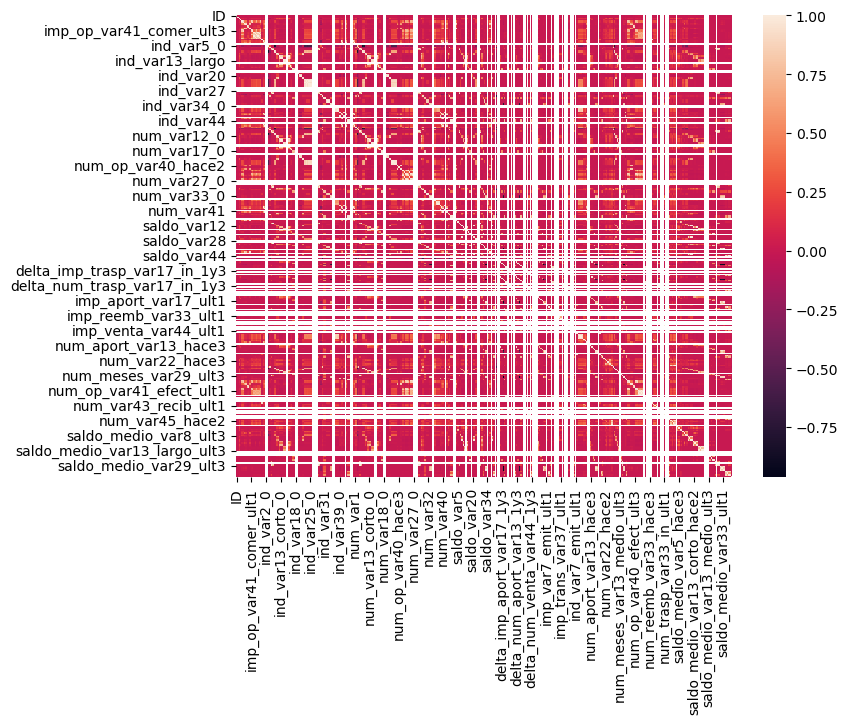

In [13]:
import seaborn as sns
#Using Pearson Correlation
corrmat = X.corr()
fig, ax = plt.subplots()
fig.set_size_inches(8,6)
sns.heatmap(corrmat)

In [15]:
corr_features = correlation(X, 0.9)
len(set(corr_features))

151

In [16]:
corr_features

{'delta_imp_aport_var33_1y3',
 'delta_num_aport_var13_1y3',
 'delta_num_aport_var17_1y3',
 'delta_num_aport_var33_1y3',
 'delta_num_compra_var44_1y3',
 'delta_num_reemb_var13_1y3',
 'delta_num_trasp_var17_in_1y3',
 'delta_num_trasp_var33_in_1y3',
 'delta_num_venta_var44_1y3',
 'imp_aport_var17_ult1',
 'imp_aport_var33_hace3',
 'imp_op_var39_efect_ult1',
 'imp_op_var39_efect_ult3',
 'imp_op_var39_ult1',
 'imp_op_var41_comer_ult1',
 'imp_op_var41_comer_ult3',
 'imp_trasp_var17_in_ult1',
 'imp_trasp_var33_in_ult1',
 'ind_var10cte_ult1',
 'ind_var13',
 'ind_var13_corto',
 'ind_var13_largo',
 'ind_var20',
 'ind_var24',
 'ind_var25',
 'ind_var25_0',
 'ind_var26',
 'ind_var26_0',
 'ind_var26_cte',
 'ind_var29',
 'ind_var29_0',
 'ind_var31',
 'ind_var32',
 'ind_var32_0',
 'ind_var33',
 'ind_var37',
 'ind_var37_0',
 'ind_var39',
 'ind_var40',
 'ind_var40_0',
 'ind_var41_0',
 'ind_var44',
 'ind_var8',
 'ind_var9_cte_ult1',
 'ind_var9_ult1',
 'num_aport_var13_ult1',
 'num_aport_var17_ult1',
 'num

In [17]:
X.drop(corr_features,axis=1)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var44_hace2,var38
0,1,2,23,0.0,0.00,0.00,0.0,0.0,0,0,...,0,0,0,0,0.0,0.0,0.0,0,0.0,39205.170000
1,3,2,34,0.0,0.00,0.00,0.0,0.0,0,0,...,0,0,0,0,0.0,0.0,0.0,0,0.0,49278.030000
2,4,2,23,0.0,0.00,0.00,0.0,0.0,0,0,...,0,0,0,0,0.0,0.0,0.0,0,0.0,67333.770000
3,8,2,37,0.0,195.00,195.00,0.0,0.0,0,0,...,0,0,0,0,0.0,0.0,0.0,0,0.0,64007.970000
4,10,2,39,0.0,0.00,0.00,0.0,0.0,0,0,...,0,0,0,0,0.0,0.0,0.0,0,0.0,117310.979016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,20069,2,52,150.0,0.00,0.00,0.0,0.0,0,0,...,0,0,0,0,0.0,0.0,0.0,0,0.0,27745.740000
9996,20070,2,23,90.0,51.06,51.06,0.0,0.0,0,0,...,0,0,0,0,0.0,0.0,0.0,0,0.0,120468.090000
9997,20071,2,37,0.0,0.00,0.00,0.0,0.0,0,0,...,0,0,0,0,0.0,0.0,0.0,0,0.0,98462.880000
9998,20072,2,24,0.0,0.00,0.00,0.0,0.0,0,0,...,0,0,0,0,0.0,0.0,0.0,0,0.0,102070.770000
